<a href="https://colab.research.google.com/github/zetsuring/palmerpenguins/blob/main/Ridge_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 0.59068496 -0.0911454 ] 1.7562728769847435
[0.2577061  0.23187976] 2.310667091596529
[0.68673924 0.27713772] 1.6320949915363934
[0.38822956 0.27750832] 1.6863246935146279
[[ 0.59068496 -0.0911454 ]
 [ 0.2577061   0.23187976]
 [ 0.68673924  0.27713772]
 [ 0.38822956  0.27750832]]
[ 0.59068496 -0.0911454 ]
(4, 2)
coef_mean 0.4808399680581873 0.17384510053457658
a_mean [[1.84633991]]
元のcoef_ [0.38822956 0.27750832]
平均化したcoef, intercept_ [[0.48083997 0.1738451 ]] [[1.84633991]]
0
Predict [2.20228369] Output 2.87
MSE [0.44584506]
1
Predict [1.45430351] Output 0.95
MSE [0.25432203]
2
Predict [0.65081118] Output 0.0
MSE [0.4235552]
Predict2 [[2.35387272]] Output [2.91]
alpha:1.0,r2_train:0.5077001873481783,r2_test:0.7371573805415483,mse_train:0.3236471274587947,mse_test:0.3745740965166899
Y_pred [2.35387272] Output 2.91
Y_pred [1.90408811] Output 0.99
Y_pred [2.60652109] Output 2.96
Y_pred [1.75249909] Output 1.91
Y_pred [2.20228369] Output 2.87
Y_pred [1.45430351] Output 0.95
Y_pred [0.650

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



[2.91, 0.99, 2.96, 1.91]
1.904088112584536
0.99
(4, 1)
(4,)
[450.0,70.0] : Train_pred:2.3538727171698017,Train_output:2.91
[300.0,70.0] : Train_pred:1.904088112584536,Train_output:0.99
[450.0,120.0] : Train_pred:2.606521088566824,Train_output:2.96
[300.0,40.0] : Train_pred:1.7524990897463224,Train_output:1.91
[0.0,40.0] : Test_pred:2.3538727171698017,Test_output:2.91
[0.0,70.0] : Test_pred:1.904088112584536,Test_output:0.99
[0.0,0.0] : Test_pred:2.606521088566824,Test_output:2.96


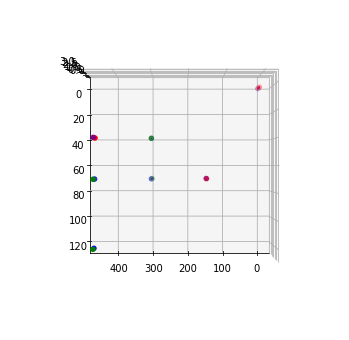

In [ ]:
import numpy as np
import sys
import os
import pandas as pd
import glob
import csv
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


from sklearn.model_selection import KFold


data=[[300, 40], [450, 40], [150, 70], [300, 70], [450, 70], [0, 0], [450, 120]] #100000 s , 0.5 K , 0.05 %
output=[1.91, 2.87, 0.95, 0.99, 2.91, 0, 2.96]

#output = np.array(output)
#output = output.reshape(-1,1)

X_test2 = np.array([[450,120]])
Y_test2 = np.array(2.96)

sc = preprocessing.StandardScaler()
sc.fit(data)
data = sc.transform(data)

#回帰分析では目的変数の標準化はいらない
#sc2 = preprocessing.StandardScaler()
#sc2.fit(output)
#output = sc2.transform(output)

ran = 100
#alpha_list = [0,0.01,0.1,1.0,10,100]

alpha_list = [1.0] #パラメータ探索の結果1.0が最適?

alpha_score = [[]] #train_r2,test_r2,train_mse,test_mse

for rd_alpha in alpha_list:

    coef_list =[[]]
    a_list =[]
    mse_list =[[]]
    r2_list = [[]]

    data = np.array(data)
    output = np.array(output)

    X_train, X_test, Y_train, Y_test = train_test_split(data, output, test_size=0.3, random_state=ran)

    kf = KFold(n_splits = len(X_train),shuffle = True,random_state = ran)
    scores =[]
    #print(kf.split(X_train))

    for train_id,test_id in kf.split(X_train):
        X_train2 = X_train[train_id]
        Y_train2 = Y_train[train_id]

        X_test2 = X_train[test_id]
        Y_test2 = Y_train[test_id]
        #print("x",X_train)
        #print("x_test",X_test)
        #print("y",Y_train)
        #print("y_test",Y_test)

        #reg_lr = LinearRegression()
        #reg_lr.fit(X_train2, Y_train2) #まずはデータで訓練

        reg_rd = Ridge(alpha =rd_alpha)
        reg_rd.fit(X_train2,Y_train2)

        #coef = reg_lr.coef_
        #a = reg_lr.intercept_

        coef = reg_rd.coef_
        a = reg_rd.intercept_


        #Y_train_pred2 = reg_lr.predict(X_train2) # 学習データに対する目的変数を予測
        #Y_pred2 = reg_lr.predict(X_test2)
        Y_train_pred2 = reg_rd.predict(X_train2) # 学習データに対する目的変数を予測
        Y_pred2 = reg_rd.predict(X_test2)
        #print('MSE train data: ', mean_squared_error(Y_train2, Y_train_pred2)) # 学習データを用いたときの平均二乗誤差を出力
        #print('MSE test data: ', mean_squared_error(Y_test2, Y_pred2))         # 検証データを用いたときの平均二乗誤差を出力

        #print('r^2 train data: ', r2_score(Y_train2, Y_train_pred2))
        #print('r^2 test data: ', r2_score(Y_test2, Y_pred2))


        print(coef, a) #傾き, 切片
        coef_list.append(coef)
        a_list.append(a)
        mse_list.append([mean_squared_error(Y_train2, Y_train_pred2),mean_squared_error(Y_test2, Y_pred2)])
        r2_list.append([r2_score(Y_train2, Y_train_pred2),r2_score(Y_test2, Y_pred2)])  #r2は2つ未満のデータからでは上手く定義できない?


    del coef_list[0]
    del mse_list[0]
    del r2_list[0]

    coef_list = np.array(coef_list)
    a_list = np.array(a_list)
    print(coef_list)
    print(coef_list[0])
    #print(len(coef_list[0][0]))
    #print(coef_list[0][0][1])
    print(np.shape(coef_list))
    #print(coef_list[2][0][1])
    coef_mean0 = np.mean(coef_list[:,0])
    coef_mean1 = np.mean(coef_list[:,1])
    a_mean = np.mean(a_list)
    a_mean = np.array(a_mean)
    a_mean = a_mean.reshape(-1,1)


    coef_mean_list = [[coef_mean0,coef_mean1]]
    #coef_mean_list = sc.inverse_transform(coef_mean_list)
    #coef_mean0 = sc.inverse_transform(coef_mean0)
    #coef_mean1 = sc.inverse_transform(coef_mean1)
    #a_mean = sc2.inverse_transform(a_mean)


    print("coef_mean",coef_mean0,coef_mean1)
    print("a_mean",a_mean)

    #print("元のcoef_",reg_lr.coef_)
    print("元のcoef_", reg_rd.coef_)

    #reg_lr.coef_ = [coef_mean0,coef_mean1]
    #reg_lr.coef = np.array(reg_lr.coef)
    #reg_lr.intercept_ = a_mean 

    reg_rd.coef_ = coef_mean_list#[coef_mean0,coef_mean1]
    reg_rd.coef_ = np.array(reg_rd.coef_)
    reg_rd.intercept_ = a_mean 

    #data = sc.inverse_transform(data)
    #print("平均化したcoef, intercept_",reg_lr.coef, reg_lr.intercept_)
    print("平均化したcoef, intercept_",reg_rd.coef_, reg_rd.intercept_)

    for i in range(1):

        #Y_train_pred = reg_lr.predict(X_train) # 学習データに対する目的変数を予測
        #Y_pred = reg_lr.predict(X_test)

        Y_train_pred = reg_rd.predict(X_train) # 学習データに対する目的変数を予測
        Y_pred = reg_rd.predict(X_test)
        #print('MSE train data: ', mean_squared_error(Y_train, Y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
        #print('MSE test data: ', mean_squared_error(Y_test, Y_pred))         # 検証データを用いたときの平均二乗誤差を出力

        #print('r^2 train data: ', r2_score(Y_train, Y_train_pred))
        #print('r^2 test data: ', r2_score(Y_test, Y_pred))

        for i in range(len(X_test)):
            print(i)
            print('Predict',Y_pred[i],'Output',Y_test[i])
            calc_mse = (Y_pred[i] - Y_test[i])**2
            print("MSE",calc_mse)

        #Y_pred2 = reg_lr.predict(X_test2)
        Y_pred2 = reg_rd.predict(X_test2)
        print("Predict2",Y_pred2, "Output",Y_test2)
    alpha_score.append([r2_score(Y_train, Y_train_pred),r2_score(Y_test, Y_pred),mean_squared_error(Y_train, Y_train_pred),mean_squared_error(Y_test, Y_pred)])


del alpha_score[0]


for i in range(len(alpha_score)):
    print(f"alpha:{alpha_list[i]},r2_train:{alpha_score[i][0]},r2_test:{alpha_score[i][1]},mse_train:{alpha_score[i][2]},mse_test:{alpha_score[i][3]}")







a = [[]]
b = [[]]
a2 =[[]]
b2 =[[]]
a3 =[[]]
b3 =[[]]
ab =data

data2=[[200, 70],  [100, 40]]
data2 = np.array(data2)

#sc = preprocessing.StandardScaler()
#sc.fit(data2)
data2 = sc.transform(data2)


Train_output = reg_rd.predict(X_train)
Test_output = reg_rd.predict(X_test)
data2_output = reg_rd.predict(data2)

###確認用
for i in range(len(X_train)):
    print("Y_pred",Train_output[i] ,"Output", Y_train[i])

for i in range(len(X_test)):
    print("Y_pred",Test_output[i] ,"Output", Y_test[i])

X_train = sc.inverse_transform(X_train)
#Y_train = sc2.inverse_transform(Y_train)
X_test = sc.inverse_transform(X_test)
#Y_test = sc2.inverse_transform(Y_test)
data2 = sc.inverse_transform(data2)


y_train_list =[[]]
y_test_list =[[]]
for i in range(len(X_train)):
    a.append(X_train[i][0])
    b.append(X_train[i][1])
for i in range(len(X_test)):
    a2.append(X_test[i][0])
    b2.append(X_test[i][1])
for i in range(len(data2)):
    a3.append(data2[i][0])
    b3.append(data2[i][1])

for i in Y_train:
    y_train_list.append(i)

for i in Y_test:
    y_test_list.append(i)

del a[0]
del b[0]
del a2[0]
del b2[0]
del a3[0]
del b3[0]
del y_train_list[0]
del y_test_list[0]

print("x_train_x",a)
print("x_train_y",b)
print(a2)
print(b2)
print(a3)
print(b3)

print(a)

print(reg_rd.predict(data2))


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90, azim=90)

#ax.scatter(a, b, reg_rd.predict(X_train), c='blue')
#ax.scatter(a2, b2, reg_rd.predict(X_test), color='red')
#ax.scatter(a3, b3, reg_rd.predict(data2), color='green')
ax.scatter(a, b, Train_output, c='blue')
ax.scatter(a2, b2, Test_output, color='red')
#ax.scatter(a3, b3, data2_output, color='green')
ax.scatter(X_train[:,0],X_train[:,1],Y_train,color ="green")
ax.scatter(X_test[:,0],X_test[:,1],Y_test,color ="purple")


print(Train_output)
print(y_train_list)

print(Train_output[1][0])
print(y_train_list[1])

print(np.shape(Train_output))
print(np.shape(y_train_list))

for i in range(len(Train_output)):
    #print(f"{[a,a]},{[b,b]},[{float(Train_output[i][0])},{float(y_train_list[i])}")
    #train_dataの実測値と予測値の誤差
    ax.plot([a[i],a[i]],[b[i],b[i]],[float(Train_output[i][0]),float(y_train_list[i])],c ='red')#線を引くときは?[x1,x2],[y1,y2]
    print(f"[{a[i]},{b[i]}] : Train_pred:{float(Train_output[i][0])},Train_output:{float(y_train_list[i])}")

for i in range(len(Test_output)):
    #test_dataの実測値と予測値の誤差
    ax.plot([a2[i],a2[i]],[b2[i],b2[i]],[float(Test_output[i][0]),float(y_test_list[i])],c ='red')#線を引くときは?[x1,x2],[y1,y2]
    print(f"[{a2[2]},{b2[i]}] : Test_pred:{float(Train_output[i][0])},Test_output:{float(y_train_list[i])}")

plt.show()